## a)
With:

$\frac{dX}{dt} = -\lambda \cdot X(t) + F$

And:

$\frac{dX}{dt} = \frac{X(t) - X(t-1)}{\Delta t}$

Follows:

$(1+\Delta t \cdot \lambda) \cdot X(t) = F \Delta t + X(t-1)$

This leads to:

$X(t) = \frac{1}{1+\Delta t \cdot \lambda}X(t-1) + \frac{\Delta t}{1+\Delta t \cdot \lambda}F$

With:

$\alpha = \frac{1}{1 + \Delta t \cdot \lambda}$

And: 

$\epsilon = \frac{\Delta t}{1 + \Delta t \cdot \lambda}F$

Follows:

$X(t) = \alpha X(t-1) + \epsilon$

## b)

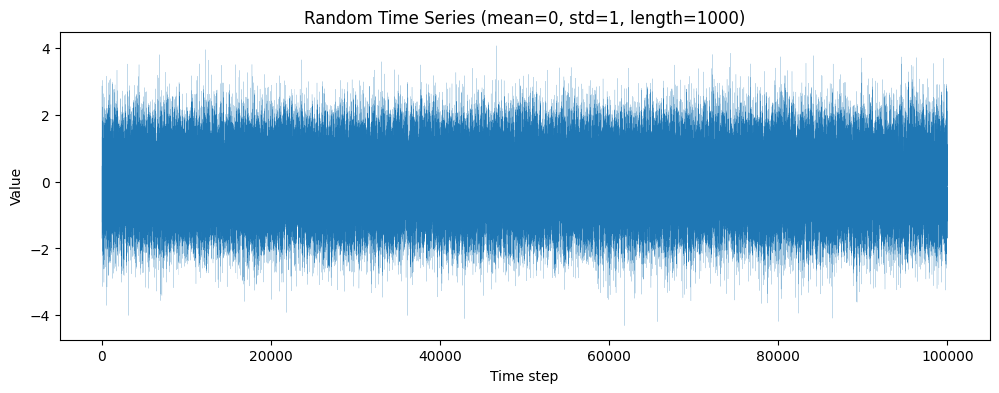

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create random time series
np.random.seed(12)  # for reproducibility
epsilon = np.random.normal(loc=0, scale=1, size=100000)

# Plot the time series
plt.figure(figsize=(12, 4))
plt.plot(epsilon, linewidth=0.1)
plt.xlabel('Time step')
plt.ylabel('Value')
plt.title('Random Time Series (mean=0, std=1, length=1000)')
plt.show()


In [2]:
del_t = 1
lam_1 = 0.1
lam_2 = 0.8


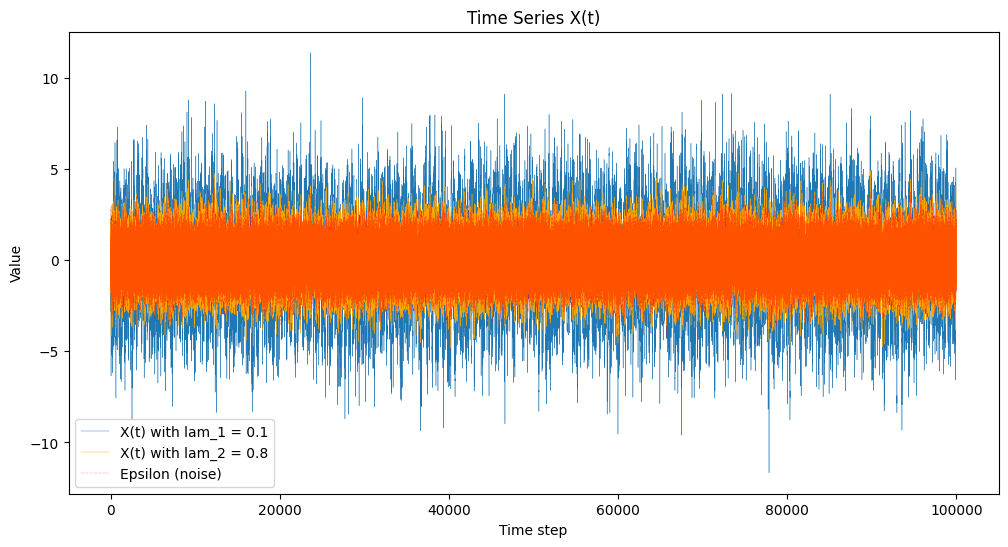

In [ ]:
# Calculate alpha
alpha_1 = 1 / (1 + del_t * lam_1)
alpha_2 = 1 / (1 + del_t * lam_2)

# Initialize the time series X
X_1 = np.zeros_like(epsilon)
X_2 = np.zeros_like(epsilon)

# The starting position X(0) is already 0 from the initialization
# Calculate the subsequent time steps
for t in range(1, len(epsilon)):
    X_1[t] = alpha_1 * X_1[t - 1] + epsilon[t]
    X_2[t] = alpha_2 * X_2[t - 1] + epsilon[t]

# Plot the resulting time series X(t)
plt.figure(figsize=(12, 6))
plt.plot(X_1, linewidth=0.3, label = 'X(t) with lam_1 = 0.1')
plt.plot(X_2, linewidth=0.3, label="X(t) with lam_2 = 0.8", color='')
plt.plot(epsilon, linewidth=0.3, label="Epsilon (noise)", alpha=0.5, linestyle="-.", color='red')
plt.xlabel('Time step')
plt.ylabel('Value')
plt.title('Time Series X(t)')
plt.legend()
plt.show()


## c)

The damping parameter $\lambda$ controls how strongly the system resists deviations from its mean state. Specifically, it determines the rate at which the process $X(t)$ is "pulled back" toward the long-term mean (here assumed to be 0).

When $\lambda$ is small, the damping is weak. In this case, the influence of the stochastic forcing term $\epsilon$ (white noise) can accumulate over time. Because the restoring force is minimal, the system is free to wander far from the mean, resulting in larger and more persistent deviations in the time series.

In contrast, when $\lambda$ is large, the damping is strong. The system reacts more quickly to perturbations, rapidly pulling deviations back toward the mean. This leads to smaller, less persistent fluctuations and a time series that appears more tightly clustered around zero.

This behavior is clearly visible in the time series plots. For example, while the orange and blue lines may have a similar noise structure, the blue time series exhibits larger deviations due to weaker damping (smaller $\lambda$), whereas the orange series is more stable and reverts to the mean more quickly.

A helpful analogy is a damped harmonic oscillator, like a mass on a spring. The damping term $\lambda$ acts like the stiffness of the spring: a stiffer spring (larger $\lambda$) resists displacement more strongly and returns the mass to equilibrium faster. Similarly, in our climate model, stronger damping results in quicker reversion to the mean.

## d)

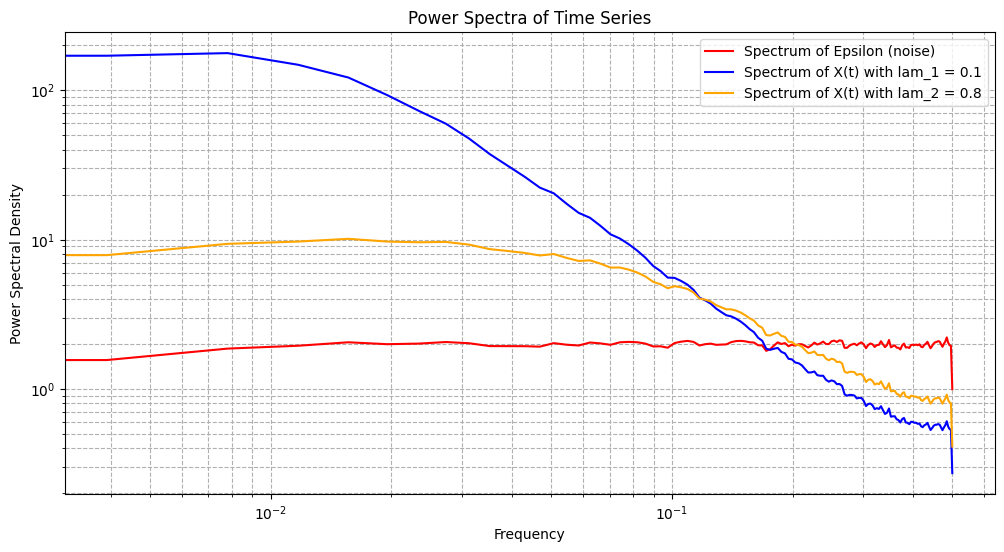

In [ ]:
from scipy.signal import welch

# Define the sampling frequency
fs = 1 / del_t

# Calculate the power spectra, providing the correct sampling frequency
f_eps, Pxx_eps = welch(epsilon, fs=fs, scaling='density')
f_x1, Pxx_x1 = welch(X_1, fs=fs, scaling='density')
f_x2, Pxx_x2 = welch(X_2, fs=fs, scaling='density')

# Plot the spectra on a log-log scale
plt.figure(figsize=(12, 6))
plt.loglog(f_eps, Pxx_eps, color="red", label="Spectrum of Epsilon (noise)")
plt.loglog(f_x1, Pxx_x1, color='blue', label='Spectrum of X(t) with lam_1 = 0.1')
plt.loglog(f_x2, Pxx_x2, color="", label="Spectrum of X(t) with lam_2 = 0.8")

plt.xlabel('Frequency')
plt.ylabel('Power Spectral Density')
plt.title('Power Spectra of Time Series')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()


## e)

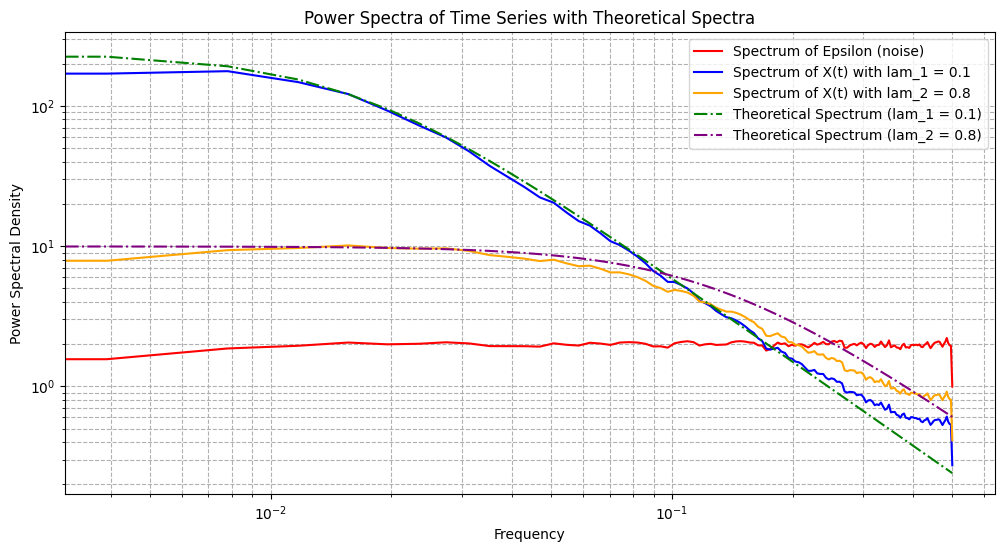

In [38]:
# The theoretical spectrum is S(f) = S_F / ((2πf)² + λ²).
# For low frequencies, the power spectral density of the continuous forcing, S_F,
# is related to the power spectral density of the discrete noise, S_ε, by S_F ≈ S_ε / Δt².
# We estimate S_ε with the mean of the calculated spectrum of epsilon.
S_eps_est = np.mean(Pxx_eps)
S_F_1 = S_eps_est * ((1 + del_t * lam_1) / del_t)**2
S_F_2 = S_eps_est * ((1 + del_t * lam_2) / del_t)**2

# Calculate the theoretical spectra
# Note: The welch frequency f is in cycles/sample, so 2*pi*f gives angular frequency
Pxx_theory_1 = S_F_1 / ((2 * np.pi * f_x1)**2 + lam_1**2)
Pxx_theory_2 = S_F_2 / ((2 * np.pi * f_x2)**2 + lam_2**2)

# Plot the spectra on a log-log scale
plt.figure(figsize=(12, 6))
plt.loglog(f_eps, Pxx_eps, color="red", label="Spectrum of Epsilon (noise)")
plt.loglog(f_x1, Pxx_x1, color="blue", label="Spectrum of X(t) with lam_1 = 0.1")
plt.loglog(f_x2, Pxx_x2, color="orange", label="Spectrum of X(t) with lam_2 = 0.8")
plt.loglog(
    f_x1,
    Pxx_theory_1,
    color="green",  # blue color
    label="Theoretical Spectrum (lam_1 = 0.1)",
    linestyle="-.",
)
plt.loglog(
    f_x2,
    Pxx_theory_2,
    color="purple",  # orange color
    label="Theoretical Spectrum (lam_2 = 0.8)",
    linestyle="-.",
)


plt.xlabel('Frequency')
plt.ylabel('Power Spectral Density')
plt.title('Power Spectra of Time Series with Theoretical Spectra')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()
